In [32]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import tensorflow as tf
from keras.models import load_model
from glob import glob
import matplotlib.pyplot as plt
import os
import cv2

In [11]:
# Re-size all the images to given size
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Python projects/Dataset/Train'
valid_path = '/content/drive/MyDrive/Python projects/Dataset/Test'

In [12]:
# Add preprocessing layer to the front of VGG16
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# For not training existing weights
for layer in vgg.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [13]:
# Useful for getting number of classes
folders = glob('/content/drive/MyDrive/Python projects/Dataset/Train/*')

# Layers - we can add if needed
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# Create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
# Tell the model what cost and optimization method to use
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Python projects/Dataset/Train',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Python projects/Dataset/Test', target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 276 images belonging to 18 classes.
Found 276 images belonging to 18 classes.


In [23]:
# fit the model
r = model.fit_generator(training_set, validation_data=test_set,
                        epochs=10,
                        steps_per_epoch=len(training_set),
                        validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
9/9 [==============================] - 10s 1s/step - loss: 0.0306 - accuracy: 0.9964 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 2/10
9/9 [==============================] - 10s 1s/step - loss: 0.0277 - accuracy: 0.9928 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 3/10
9/9 [==============================] - 10s 1s/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 4/10
9/9 [==============================] - 10s 1s/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 5/10
9/9 [==============================] - 10s 1s/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 6/10
9/9 [==============================] - 10s 1s/step - loss: 0.0188 - accuracy: 0.9964 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 7/10
9/9 [==============================] - 10s 1s/step - loss: 0.0137 - accuracy: 0.9964 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 8/10
9/9 [==================

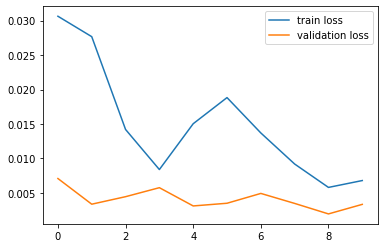

<Figure size 432x288 with 0 Axes>

In [24]:
# Calculate the Loss in Graph
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.jpg')

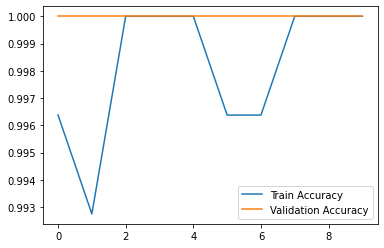

<Figure size 432x288 with 0 Axes>

In [25]:
# Accuracies curve in Graphs
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
model.save('SaVGG16_FaceRecognizer_Model.h5')
print("Your model is in ==> ", os.getcwd())

Your model is in ==>  /content


# Don't Runn last code for deleting the model it will delete your all training model

In [27]:
#del model
#print("Model has been deleted")

#<-------------------------Testing------------------------------>

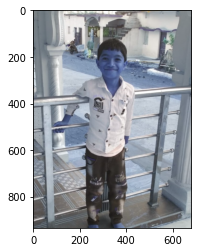

In [45]:
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("/content/drive/MyDrive/Python projects/Dataset/Test/Akarsh_Dhurve/04.jpeg")
img = img/255
plt.imshow(img)

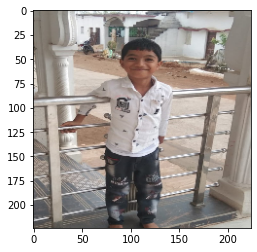

In [49]:

import keras
from tensorflow.keras.utils import load_img
img = load_img("/content/drive/MyDrive/Python projects/Dataset/Test/Akarsh_Dhurve/04.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

In [50]:
saved_model = load_model("SaVGG16_FaceRecognizer_Model.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("not akarsh")
else:
    print('akarsh')

1/1 [==============================] - 1s 771ms/step
not akarsh


In [59]:
def testing_image(image_directory):
    test_image = load_img(image_directory, target_size = (224, 224))
    test_image = np.asarray(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
#Changes in code
    pred = model.predict(test_image)
    result = np.where(pred > 0.5, 1, 0) #<--to get the binary category
    print(result)
testing_image('/content/drive/MyDrive/Python projects/Dataset/Test/Sangram_Bahadur/22.jpg')

1/1 [==============================] - 0s 17ms/step
[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]
